# Plotting choropleth rasters

In [2]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import os
os.chdir("../../../")

In [30]:
r = rxr.open_rasterio("data/wtd.tif")
a = r.values[0]
a[a == -999.9] = np.nan

A contains a 2D raster of water table depth (Fan et al., 2017). To visualise this one can simply use matplotlib directly.

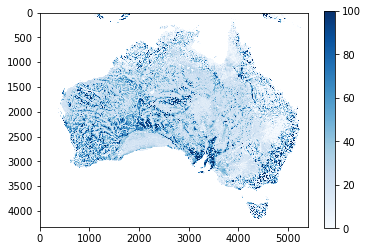

In [18]:
plt.imshow(a, cmap="Blues_r", vmax=100)
plt.colorbar()
plt.show()

At its simplests, ``geomappy`` does exactly this (although some esthetic differences can be seen):

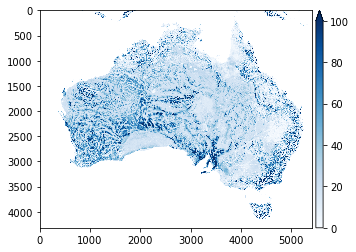

In [24]:
mp.plot_raster(a, cmap="Blues_r", vmax=100)
plt.show()

The biggest difference in workflow comes with the binning of the data. This gets handled internally instead of having to specify this with numpy outisde the plotting interface.

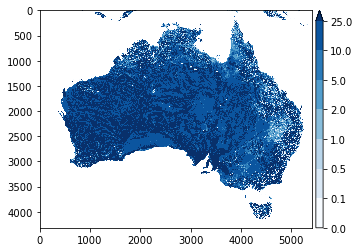

In [27]:
mp.plot_raster(a, bins=[0,0.1,0.5,1,2,5,10,25], cmap="Blues_r")
plt.show()

In this case, the colorbar can be converted into a true legend (figure size is expanded with ``figsize`` to fit the legend):

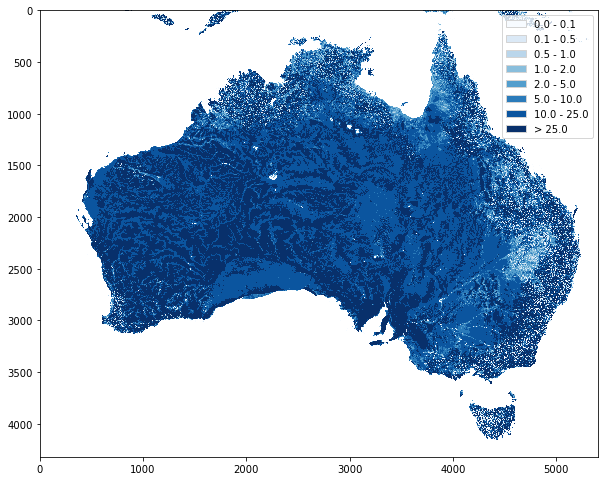

In [29]:
mp.plot_raster(a, bins=[0,0.1,0.5,1,2,5,10,25], cmap="Blues_r", legend='legend', figsize=(10, 10))
plt.show()

## With a basemap

The functionality described above and in the section on basemaps can be applied here. First the bounds need to be extracted from the raster.

In [36]:
bounds = r.rio.bounds()
bounds

(109.999999342, -44.999998545, 155.000000419, -8.999999499)

Then a basemap needs to be created

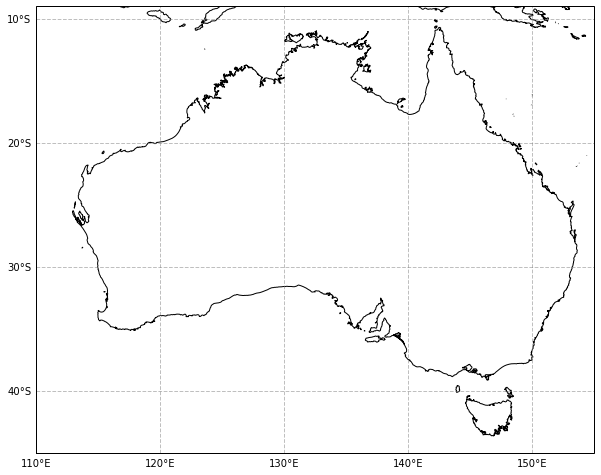

In [38]:
ax = mp.basemap(bounds, resolution='10m', xticks=10, yticks=10)

Then this GeoAxes object needs to be passed to the plotting function.

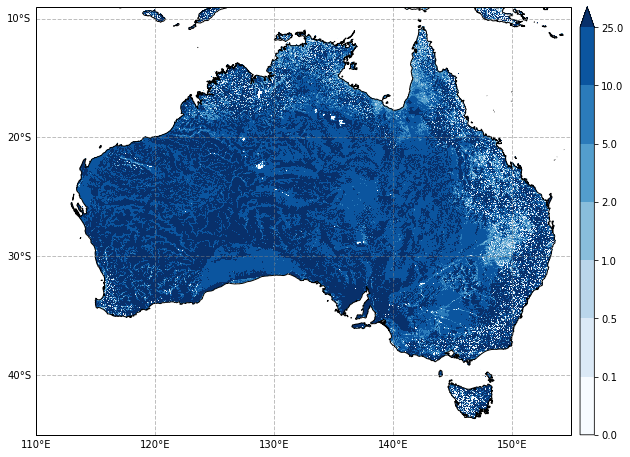

In [44]:
ax = mp.basemap(bounds, resolution='10m', xticks=10, yticks=10)
mp.plot_raster(a, ax=ax, cmap="Blues_r", bins=[0,0.1,0.5,1,2,5,10,25])
plt.show()

This workflow (and some other handy features) are encapsulated entirely within an addition to the rioxarray object. The first thing that one might do when opening a raster, is to check where this exactly falls on the globe.